In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap
from pathlib import Path

In [2]:
# Load predictions

df = pd.read_csv('../model_outputs/predictions_mlflow_test_05_08.csv')


In [4]:
# Quick check
print(df['Actual'].value_counts())
print(df['Predicted'].value_counts())

Actual
0    42035
1      245
Name: count, dtype: int64
Predicted
0    28989
1    13291
Name: count, dtype: int64


In [6]:
# Confusion matrix components
TP = ((df['Actual'] == 1) & (df['Predicted'] == 1)).sum()
FP = ((df['Actual'] == 0) & (df['Predicted'] == 1)).sum()
FN = ((df['Actual'] == 1) & (df['Predicted'] == 0)).sum()
TN = ((df['Actual'] == 0) & (df['Predicted'] == 0)).sum()

# Costs
cost_missed = FN * 4000
cost_false_positive = FP * 500
savings = TP * 4000
net_savings = savings - (cost_missed + cost_false_positive)

# Display results
print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"Missed Derate Cost: ${cost_missed}")
print(f"False Positive Cost: ${cost_false_positive}")
print(f"Cost Savings from True Positives: ${savings}")
print(f"Net Cost Savings: ${net_savings}")

True Positives: 214
False Positives: 13077
False Negatives: 31
Missed Derate Cost: $124000
False Positive Cost: $6538500
Cost Savings from True Positives: $856000
Net Cost Savings: $-5806500


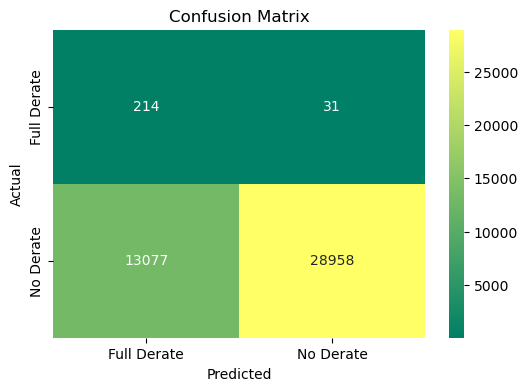

In [13]:
labels_order = [1, 0]
labels = ['Full Derate', 'No Derate']

cm = confusion_matrix(df['Actual'], df['Predicted'], labels=labels_order)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
|